# 1. Análisis exploratorio de datos (EDA)

Los datos que tenemos son:
1. datos_champions_limpio.csv - Información general sobre la Champions League de distintos años.
2. overall_limpio.csv - Información adicional que contine datos de equipos y partidos.
3. jugadores_limpio.csv - Datos específicos sobre jugadores.

### Paso 1: Carga y revisión inicial de los datos

In [1]:
#Importamos las librerias necesarias
import pandas as pd

In [6]:
#Cargamos los datos
data_champions= pd.read_csv('../data/datos_champions_limpio.csv')
overall= pd.read_csv('../data/overall_limpio.csv')
jugadores= pd.read_csv('../data/jugadores_limpio.csv')

In [9]:
#Revision incial de los datos, dimensiones y primeros registros
estructura_datos= {
    'datos_champions':{
        'dimensiones': data_champions.shape,
        'primeros_registros': data_champions.head(5)
    },
    'overall':{
        'dimensiones': overall.shape,
        'primeros_registros': overall.head(5)
    },
    'jugadores':{
        'dimensiones': jugadores.shape,
        'primeros_registros': jugadores.head(5)

    }
}

estructura_datos

{'datos_champions': {'dimensiones': (574, 13),
  'primeros_registros':       Season        Round  Day        Date Time           Home Score  \
  0  2003-2004  Round of 16  Tue  2004-02-24  NaN     Celta Vigo   2–3   
  1  2003-2004  Round of 16  Tue  2004-02-24  NaN  Bayern Munich   1–1   
  2  2003-2004  Round of 16  Tue  2004-02-24  NaN  Sparta Prague   0–0   
  3  2003-2004  Round of 16  Tue  2004-02-24  NaN    Loko Moscow   2–1   
  4  2003-2004  Round of 16  Wed  2004-02-25  NaN          Porto   2–1   
  
             Away Attendance              Venue          Referee  Match Report  \
  0         Arsen        NaN           Balaídos     Anders Frisk  Match Report   
  1     Real Madr        NaN     Olympiastadion      Terje Hauge  Match Report   
  2         Milan        NaN      Stadion Letná      Graham Poll  Match Report   
  3          Mona        NaN  Stadion Lokomotiv  Mejuto González  Match Report   
  4  Manchester U        NaN  Estádio do Dragão   Herbert Fandel  Match Re

### Paso 2: Identificación de Variables Clave y Visualizaciones

Algunas variables que intuitivamente se ven que son valiosas son:
* Para jugadores: Goles, asistencias, goles esperados (xG), asistencias esperadas (xA).
* Para equipos: Goles a favor y en contra, puntos, posición final en el torneo.

Para ver la relación entre las variables usaré una matriz de correlación para el conjunto de datos de los equipos (overall)
con lo que observaremos cómo las variables estadísticas de los equipos se relacionan entre sí y con el éxito (por ejemplo, llegar a las fases finales del torneo).

In [13]:
#Importamos las librerias necesarias
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Conversión de la columna 'Rk' a una escala numérica para poder correlacionarla
rank_conversion = {'W': 1, 'F': 2, 'SF': 3, 'QF': 4, 'R16': 5, 'R32': 6, 'GS': 7}
overall['Rk_numerico'] = overall['Rk'].map(rank_conversion)

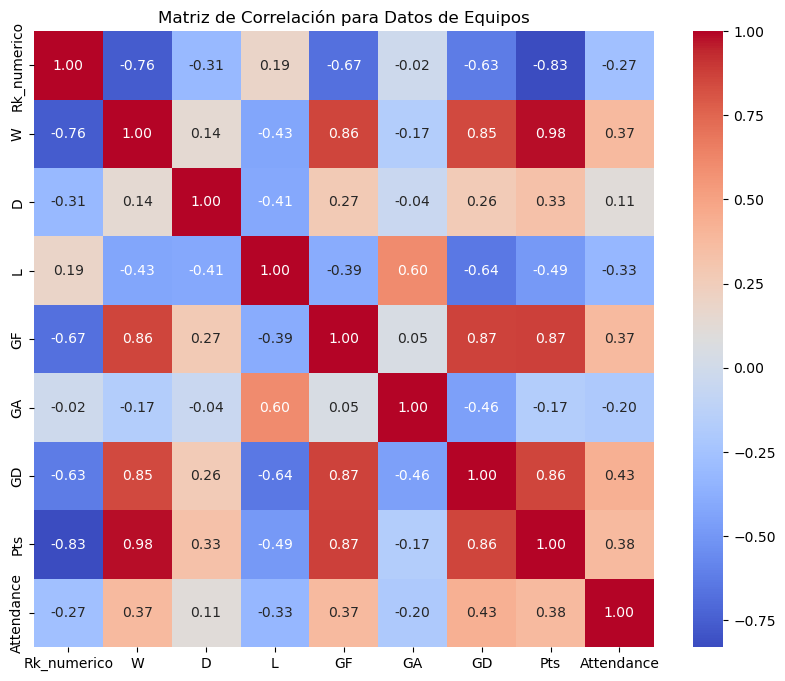

In [14]:
# Calculamos la matriz de correlación para las variables numéricas relevantes
correlation_matrix = overall[['Rk_numerico', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Attendance']].corr()

# Generamos el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación para Datos de Equipos')
plt.show()


La matriz de correlación para los datos de los equipos revela varias relaciones interesantes:

1. **Relación con el Ranking Numérico (Rk_numerico):** Esta variable, que representa el éxito del equipo en la Champions League (donde 1 es el ganador y los números más altos indican una eliminación más temprana), muestra fuertes correlaciones negativas con las victorias (W) y los puntos (Pts). Esto significa que, como se esperaba, cuantas más victorias y más puntos tenga un equipo, más probable es que avance a las etapas finales del torneo.

2. **Goles a Favor (GF) y Diferencia de Goles (GD):** Ambos tienen fuertes correlaciones negativas con el ranking numérico, indicando que los equipos que marcan más goles y tienen una mayor diferencia de goles tienden a llegar más lejos en el torneo.

3. **Goles en Contra (GA):** Tiene una correlación positiva más débil con el ranking numérico, lo que sugiere que, aunque los goles en contra impactan negativamente en el rendimiento del equipo, su efecto es menos pronunciado que el de marcar goles.